In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.svm  import SVR
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Note: In the file 'finalGeneratefinver' the function 'nongibbs' produces density matrices that are not in thermal equilibrium and the temperature (Beta) according to the proposed definition in the paper.

In [2]:
# Here we just read the data
df = pd.read_csv('QT - dimension 4.csv')


df = df.drop('Unnamed: 0', axis=1)

# df = df.sample(n=10000)
# df = df.sample(n=20000)
dfnon=pd.read_csv('nonthermal - dimension 4.csv')
print(df)

# fetures: Tr((I X I) H) ,Tr( (I X Sx) H) , Tr((I X Sy) H), Tr((I X Sz) H), Tr((Sx X I)H), ... , Tr((IXI) Rho), ...
# labels: Beta

X = df[["fp hamiltonian1", "fp hamiltonian2", "fp hamiltonian3", "fp hamiltonian4", "fp hamiltonian5", "fp hamiltonian6", "fp hamiltonian7", "fp hamiltonian8", "fp hamiltonian9", "fp hamiltonian10", "fp hamiltonian11", "fp hamiltonian12", "fp hamiltonian13", "fp hamiltonian14", "fp hamiltonian15", "fp hamiltonian16", "fp rho2", "fp rho3", "fp rho4", "fp rho5", "fp rho6", "fp rho7", "fp rho8", "fp rho9", "fp rho10", "fp rho11", "fp rho12", "fp rho13", "fp rho14", "fp rho15", "fp rho16"]].to_numpy()

Y = df["beta"].to_numpy()
# Data for non-equilibrium states
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
Xnon=dfnon[["fp hamiltonian1", "fp hamiltonian2", "fp hamiltonian3", "fp hamiltonian4", "fp hamiltonian5", "fp hamiltonian6", "fp hamiltonian7", "fp hamiltonian8", "fp hamiltonian9", "fp hamiltonian10", "fp hamiltonian11", "fp hamiltonian12", "fp hamiltonian13", "fp hamiltonian14", "fp hamiltonian15", "fp hamiltonian16", "fp rho2", "fp rho3", "fp rho4", "fp rho5", "fp rho6", "fp rho7", "fp rho8", "fp rho9", "fp rho10", "fp rho11", "fp rho12", "fp rho13", "fp rho14", "fp rho15", "fp rho16"]].to_numpy()
Ynon=dfnon['beta'].to_numpy()

       fp hamiltonian1  fp hamiltonian2  fp hamiltonian3  fp hamiltonian4  \
0             2.465892         1.343422        -0.118425        -1.009230   
1            -0.658163         0.000000         0.000000         0.223885   
2             0.632095         0.000000         0.000000        -0.478180   
3             1.003179         0.000000         0.000000        -1.427964   
4             2.455265         0.000000         0.000000        -0.581041   
...                ...              ...              ...              ...   
99995         2.160893         0.049310        -0.907184         0.733235   
99996         1.489493        -0.914604        -1.885580        -1.831748   
99997        -0.163619        -0.908653        -0.307304         0.384217   
99998         2.739235        -0.146491         0.881627         1.081060   
99999         0.055144         0.738444         0.313567        -1.603057   

       fp hamiltonian5  fp hamiltonian6  fp hamiltonian7  fp hamiltonian8  

In [3]:
print(X)
print(Y)

[[ 2.46589249e+00  1.34342178e+00 -1.18425306e-01 ... -7.01738603e-02
  -1.14677376e-02 -6.52472237e-02]
 [-6.58162877e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.21963325e-02]
 [ 6.32094631e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.40421905e-01]
 ...
 [-1.63618960e-01 -9.08653204e-01 -3.07303995e-01 ...  2.88822798e-02
  -4.95965234e-02  2.13043172e-02]
 [ 2.73923543e+00 -1.46491109e-01  8.81626921e-01 ...  8.03461884e-02
   1.03888836e-01  2.77742774e-01]
 [ 5.51444028e-02  7.38443660e-01  3.13567251e-01 ...  1.64399041e-03
   1.46430389e-01 -1.91757629e-01]]
[0.37593264 0.69609332 0.36969051 ... 0.1314799  0.88290224 0.49238023]


Linear Regression

In [4]:
# Here we train different polynomial models with different complexities
list_of_degrees = np.arange(1, 4)

test_scores_reg = np.zeros(len(list_of_degrees))
train_scores_reg = np.zeros(len(list_of_degrees))

for degree in range(len(list_of_degrees)):
    degree_of_polynomial = list_of_degrees[degree]

    poly = PolynomialFeatures(degree_of_polynomial, include_bias=False)
    X_train_new = poly.fit_transform(X_train)
    X_test_new = poly.fit_transform(X_test)

    print(X.shape, X_train_new.shape)

    regr = LinearRegression().fit(X_train_new, Y_train)

    train_scores_reg[degree] = regr.score(X_train_new, Y_train)
    test_scores_reg[degree] = regr.score(X_test_new, Y_test)
print(train_scores_reg,test_scores_reg)
# performance of the best model on non-equilibrium states
print(regr.score(poly.fit_transform(Xnon),Ynon))

(100000, 31) (85000, 31)
(100000, 31) (85000, 527)
(100000, 31) (85000, 5983)
[3.83989213e-04 8.46071395e-01 9.34085027e-01] [-0.00128269  0.84367336  0.92746164]
-5.181201540999649e+19


[]

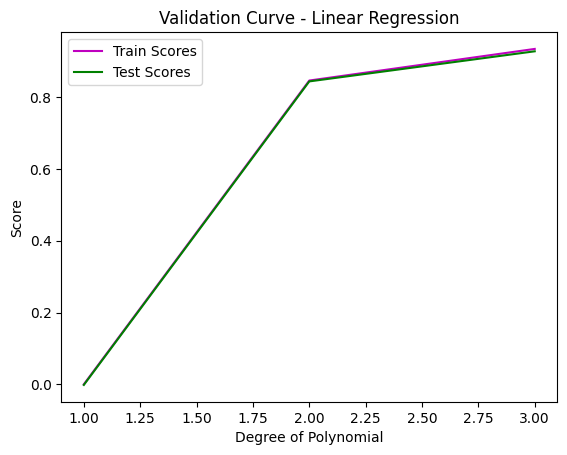

In [5]:


plt.plot(list_of_degrees, train_scores_reg, color='m', label='Train Scores') 
plt.plot(list_of_degrees, test_scores_reg, color='g', label='Test Scores') 

plt.title('Validation Curve - Linear Regression')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Score')
plt.legend()

plt.plot()


If we increase the degree to 4, the model will have nearly 60000 parameters and it will take a huge amount of time so we did not train a model with that complexity.

In [6]:
regr = LinearRegression()
poly = PolynomialFeatures(2, include_bias=False)
train_frac = np.linspace(0.1, 1.0, 10)

train_size_abs, train_scores, test_scores = learning_curve(regr, poly.fit_transform(X_train), Y_train, train_sizes=train_frac , cv=5)

Here again we tried to obtain the learning curve for a polynomial model with degree 3 but the computational cost is too high and we did not get any results in a reasonable time.

In [7]:

test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

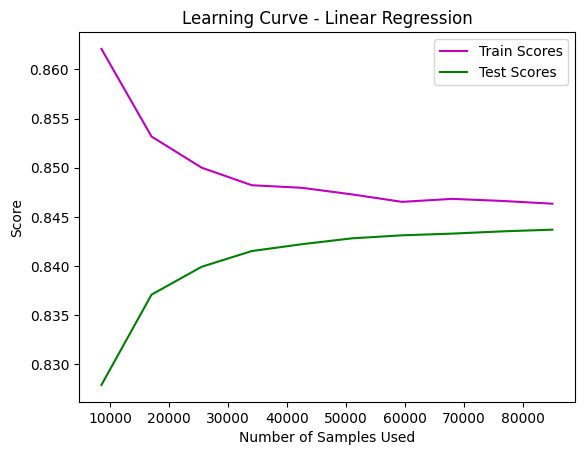

In [8]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - Linear Regression')
plt.xlabel('Number of Samples Used')
plt.ylabel('Score')
plt.legend()

plt.plot()

Apparantly we have enough samples for this model, judging from the slope of the two curves, although they are not going to intersect.

KNN

In [9]:
# Here we use KN Regressor for different numbers of neighbors
list_of_neighbors = np.arange(1, 6)

test_scores_knn_normal = np.zeros(len(list_of_neighbors))
train_scores_knn_normal = np.zeros(len(list_of_neighbors))


for neighbors in range(len(list_of_neighbors)):

    number_of_neighbors = list_of_neighbors[neighbors]


    neigh_normal = KNeighborsRegressor(n_neighbors= number_of_neighbors, weights='uniform',metric='cityblock')
    neigh_normal.fit(X_train, Y_train)


    print(neighbors+1, len(list_of_neighbors))

    

    train_scores_knn_normal[neighbors] = neigh_normal.score(X_train, Y_train)
    test_scores_knn_normal[neighbors] = neigh_normal.score(X_test, Y_test)
# performance of the best model on non-equilibrium states
print(train_scores_knn_normal)
print(test_scores_knn_normal)
print(neigh_normal.score(Xnon,Ynon))

1 5
2 5
3 5
4 5
5 5
-0.7841657092819094


[]

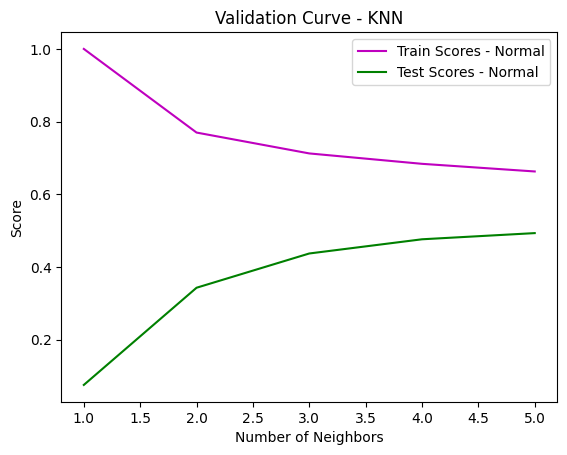

In [10]:
plt.plot(list_of_neighbors, train_scores_knn_normal, color='m', label='Train Scores - Normal') 
plt.plot(list_of_neighbors, test_scores_knn_normal, color='g', label='Test Scores - Normal') 

plt.title('Validation Curve - KNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.legend()

plt.plot()

For all parameters, the model is very bad. But the two scores are converging.

In [11]:
neigh_distance = KNeighborsRegressor(n_neighbors= 4, weights='uniform',metric='cityblock')



train_frac = np.linspace(0.1, 1.0, 5)

train_size_abs, train_scores, test_scores = learning_curve(neigh_distance, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)

In [12]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

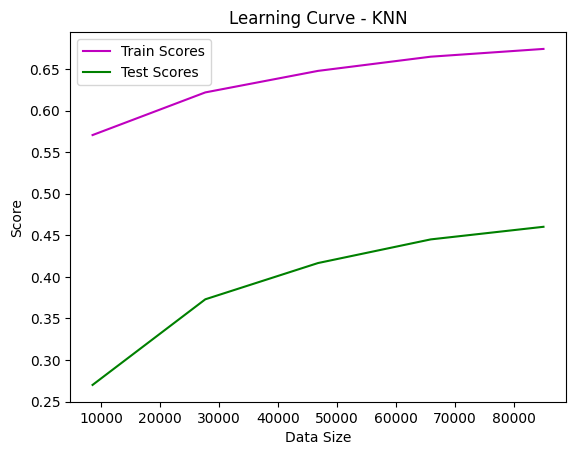

In [13]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - KNN')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

We could use more data, because the slope is not near zero.

In [14]:
neigh_cityblock = KNeighborsRegressor(n_neighbors= 15, metric='cityblock')
neigh_cityblock.fit(X_train, Y_train)

neigh_cosine = KNeighborsRegressor(n_neighbors= 15, metric='cosine')
neigh_cosine.fit(X_train, Y_train)

neigh_euclidean = KNeighborsRegressor(n_neighbors= 15, metric='euclidean')
neigh_euclidean.fit(X_train, Y_train)

neigh_l1 = KNeighborsRegressor(n_neighbors= 15, metric='l1')
neigh_l1.fit(X_train, Y_train)

neigh_l2 = KNeighborsRegressor(n_neighbors= 15, metric='l2')
neigh_l2.fit(X_train, Y_train)

neigh_manhattan = KNeighborsRegressor(n_neighbors= 15, metric='manhattan')
neigh_manhattan.fit(X_train, Y_train)

neigh_nan_euclidean = KNeighborsRegressor(n_neighbors= 15, metric='nan_euclidean')
neigh_nan_euclidean.fit(X_train, Y_train)



train_scores_knn_cityblock = neigh_cityblock.score(X_train, Y_train)
test_scores_knn_cityblock = neigh_cityblock.score(X_test, Y_test)

print('cityblock: ')
print(train_scores_knn_cityblock, test_scores_knn_cityblock)

train_scores_knn_cosine = neigh_cosine.score(X_train, Y_train)
test_scores_knn_cosine = neigh_cosine.score(X_test, Y_test)

print('cosine: ')
print(train_scores_knn_cosine, test_scores_knn_cosine)


train_scores_knn_euclidean = neigh_euclidean.score(X_train, Y_train)
test_scores_knn_euclidean = neigh_euclidean.score(X_test, Y_test)

print('euclidean: ')
print(train_scores_knn_euclidean, test_scores_knn_euclidean)



train_scores_knn_l1 = neigh_l1.score(X_train, Y_train)
test_scores_knn_l1 = neigh_l1.score(X_test, Y_test)

print('l1: ')
print(train_scores_knn_l1, test_scores_knn_l1)

train_scores_knn_l2 = neigh_l2.score(X_train, Y_train)
test_scores_knn_l2 = neigh_l2.score(X_test, Y_test)

print('l2: ')
print(train_scores_knn_l2, test_scores_knn_l2)


train_scores_knn_manhattan = neigh_manhattan.score(X_train, Y_train)
test_scores_knn_manhattan = neigh_manhattan.score(X_test, Y_test)

print('manhattan: ')
print(train_scores_knn_manhattan, test_scores_knn_manhattan)

train_scores_knn_nan_euclidean = neigh_nan_euclidean.score(X_train, Y_train)
test_scores_knn_nan_euclidean = neigh_nan_euclidean.score(X_test, Y_test)

print('nan_euclidean: ')
print(train_scores_knn_nan_euclidean, test_scores_knn_nan_euclidean)

cityblock: 
0.5842461571084123 0.5192883004010433
cosine: 
0.2204954532364053 0.10204473123457458
euclidean: 
0.20791535018012552 0.08883827766838226
l1: 
0.5842461571084123 0.5192883004010433
l2: 
0.20791535018012552 0.08883827766838226
manhattan: 
0.5842461571084123 0.5192883004010433
nan_euclidean: 
0.20791535018012552 0.08883827766838226


In [15]:
# we examine the performance of the best metric on the non-equilibrium states
print(neigh_cityblock.score(Xnon, Ynon))

-0.7931553765834578


Random Forest

In [16]:
df=df.sample(n=20000)
X = df[["fp hamiltonian1", "fp hamiltonian2", "fp hamiltonian3", "fp hamiltonian4", "fp hamiltonian5", "fp hamiltonian6", "fp hamiltonian7", "fp hamiltonian8", "fp hamiltonian9", "fp hamiltonian10", "fp hamiltonian11", "fp hamiltonian12", "fp hamiltonian13", "fp hamiltonian14", "fp hamiltonian15", "fp hamiltonian16", "fp rho2", "fp rho3", "fp rho4", "fp rho5", "fp rho6", "fp rho7", "fp rho8", "fp rho9", "fp rho10", "fp rho11", "fp rho12", "fp rho13", "fp rho14", "fp rho15", "fp rho16"]].to_numpy()

Y = df["beta"].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)



list_of_depth = np.array([10, 15, 18, 20, 22])

test_scores_random_forest = np.zeros(len(list_of_depth))
train_scores_random_forest = np.zeros(len(list_of_depth))

for depth_count in range(len(list_of_depth)):
    depth = list_of_depth[depth_count]

    regr_forest = RandomForestRegressor(max_depth= depth)
    regr_forest.fit(X_train, Y_train)

    print(depth_count+1, len(list_of_depth))

    
    
    train_scores_random_forest[depth_count] = regr_forest.score(X_train, Y_train)
    test_scores_random_forest[depth_count] = regr_forest.score(X_test, Y_test)
# performance of the best model on non-equilibrium states
print(train_scores_random_forest)
print(test_scores_random_forest)
print(regr_forest.score(Xnon,Ynon))

1 5
2 5
3 5
4 5
5 5
[0.93385706 0.98190696 0.9872717  0.98846588 0.98897615]
[0.89670725 0.92196343 0.92577124 0.9264499  0.92707022]
-3.85118028434952


In order to save time and make the training of the model less expensive, we reduced the number of data points.

[]

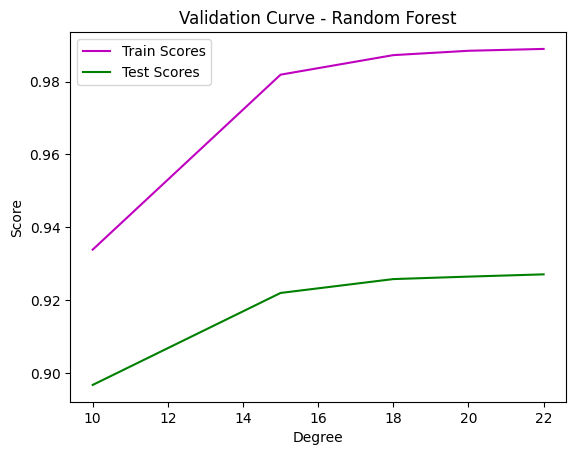

In [17]:


plt.plot(list_of_depth, train_scores_random_forest, color='m', label='Train Scores') 
plt.plot(list_of_depth, test_scores_random_forest, color='g', label='Test Scores') 

plt.title('Validation Curve - Random Forest')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend()

plt.plot()

In [18]:
regr_forest = RandomForestRegressor(max_depth= 18)

train_frac = np.linspace(0.1, 1.0, 5)

train_size_abs, train_scores, test_scores = learning_curve(regr_forest, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)


In [19]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

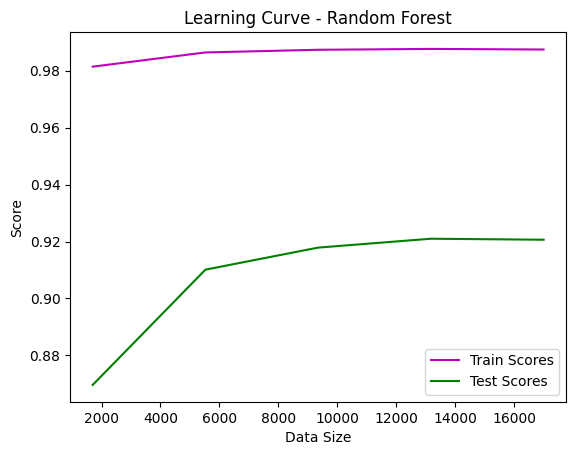

In [20]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - Random Forest')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

It seems we have enough data eventhough we have only used one-fifth of our samples.

SVR

In [21]:
params_dist = {'C': expon(scale=0.5), 'gamma':expon(scale=0.5)}


Clf = SVR()
opt_clf = RandomizedSearchCV(Clf, param_distributions=params_dist, cv=5, n_jobs=-1)
opt_clf.fit(X_train,Y_train)


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002979F1C6910>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002979BDA3E80>})

In [22]:
best_pipeline = opt_clf.best_estimator_

best_parameters_svr = opt_clf.best_params_

In [23]:
best_C = best_parameters_svr['C']
best_gamma = best_parameters_svr['gamma']

In [24]:
opt_clf.score(X_train, Y_train)

0.8780519685528826

In [25]:
opt_clf.score(X_test, Y_test)

0.8256077747793609

In [26]:
# performance of the model on non-equilibrium states
opt_clf.score(Xnon, Ynon)

0.27602341222902727

Learning Curve of SVR

In [27]:

train_frac = np.linspace(0.1, 1.0, 5)

train_size_abs, train_scores, test_scores = learning_curve(best_pipeline, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)


In [28]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

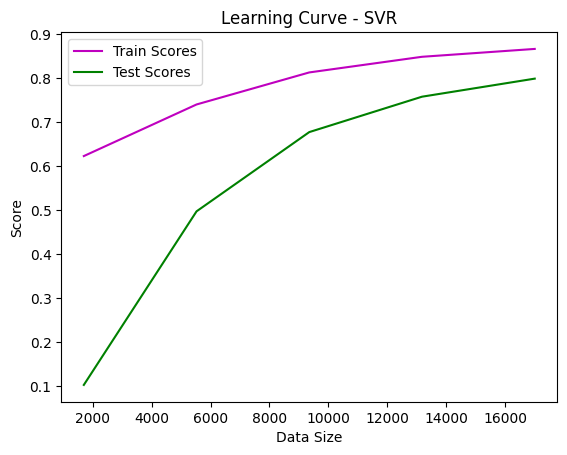

In [29]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - SVR')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

We have enough data.

Decision Tree

In [30]:
list_of_depth = np.array([10, 15, 16, 17, 18, 20, 22, 25, 30])

test_scores_tree = np.zeros(len(list_of_depth))
train_scores_tree = np.zeros(len(list_of_depth))

for depth_count in range(len(list_of_depth)):
    depth = list_of_depth[depth_count]

    regr_tree = DecisionTreeRegressor(max_depth= depth)
    regr_tree.fit(X_train, Y_train)

    print(depth_count+1, len(list_of_depth))

    
    
    train_scores_tree[depth_count] = regr_tree.score(X_train, Y_train)
    test_scores_tree[depth_count] = regr_tree.score(X_test, Y_test)
# performance of the best model on non-equilibrium states
print(train_scores_tree)
print(test_scores_tree)
print(regr_tree.score(Xnon,Ynon))

1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
[0.88104991 0.97822625 0.98546925 0.9905079  0.99380116 0.99745803
 0.99914342 0.99988259 0.99999651]
[0.7971139  0.81187183 0.81396899 0.81708798 0.80999564 0.81623001
 0.813638   0.81309276 0.80891454]
-4.0708560901198405


[]

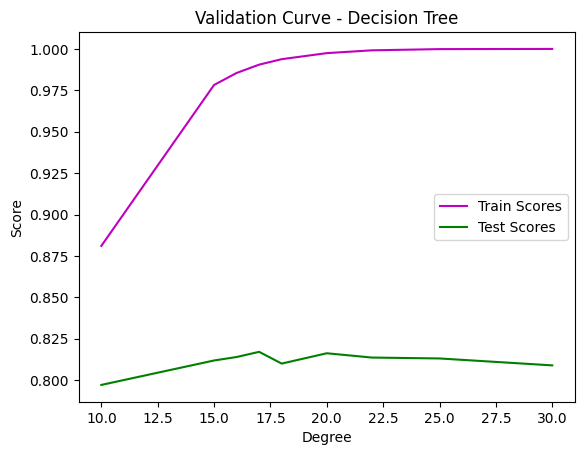

In [31]:
plt.plot(list_of_depth, train_scores_tree, color='m', label='Train Scores') 
plt.plot(list_of_depth, test_scores_tree, color='g', label='Test Scores') 

plt.title('Validation Curve - Decision Tree')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.legend()

plt.plot()

The test scores are increasing with respect to the complexity of the model but the test scores do not change.

In [32]:
regr_tree = DecisionTreeRegressor(max_depth= 17)

train_frac = np.linspace(0.1, 1.0, 5)

train_size_abs, train_scores, test_scores = learning_curve(regr_tree, X_train, Y_train, train_sizes=train_frac , cv=5, n_jobs=-1)

In [33]:
test_scores = test_scores.mean(axis=1)
train_scores = train_scores.mean(axis=1)

[]

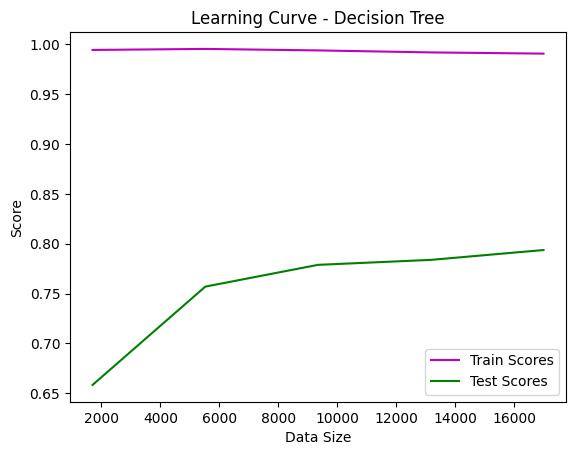

In [34]:
samples_used = train_frac * len(X_train)

plt.plot(samples_used, train_scores, color='m', label='Train Scores') 
plt.plot(samples_used, test_scores, color='g', label='Test Scores') 

plt.title('Learning Curve - Decision Tree')
plt.xlabel('Data Size')
plt.ylabel('Score')
plt.legend()

plt.plot()

No visible change is seen as data size goes past 10000.

In [36]:
print('Best scores')
print('LinearRegression: ' + 'test_scores: ' + str(test_scores_reg.max()) + ' - train scores: ' + str(train_scores_reg.max()) + '- optimization time: ' + str(221) +'s' )
print('KNN: ' + 'test_scores: '+ str(test_scores_knn_normal.max()) +' - train scores: '+ str(train_scores_knn_normal.max()) + '- optimization time: ' + str(260) +'s' )
print('Random Forest: ' + 'test_scores: '+ str(test_scores_random_forest.max()) + ' - train scores: '+ str(train_scores_random_forest.max()) + '- optimization time: ' + str(240) +'s')
print('SVR: ' + 'test_scores: ' + str(test_scores.max()) + ' - train scores: ' + str(train_scores.max()) + '- optimization time: ' + str(240) + 's' )
print('Decision Tree: ' + 'test_scores: '+ str(test_scores_tree.max()) +' - train scores: ' + str(train_scores_tree.max()) + '- optimization time: ' + str(43) +'s' )

Best scores
LinearRegression: test_scores: 0.9274616419886407 - train scores: 0.9340850265572713- optimization time: 221s
KNN: test_scores: 0.49328110148752125 - train scores: 1.0- optimization time: 260s
Random Forest: test_scores: 0.9270702152665117 - train scores: 0.9889761523198523- optimization time: 240s
SVR: test_scores: 0.7936133033960265 - train scores: 0.9953687020649088- optimization time: 240s
Decision Tree: test_scores: 0.8170879792818505 - train scores: 0.9999965061594754- optimization time: 43s


Linear regression and Random forest have the best test scores, and the former is faster. Desicion tree is siginigicantly faster than the remaining two and is more accurate than them. Note that we used fewer samples for the last 3 models, so we can not compare the time it takes for all of them.

All of the models performed poorly on non-equilibrium states.

All models performed disastrously on non-equilibrium states, among them the worst one seems to be the regression model, and the "best" one is random forest.